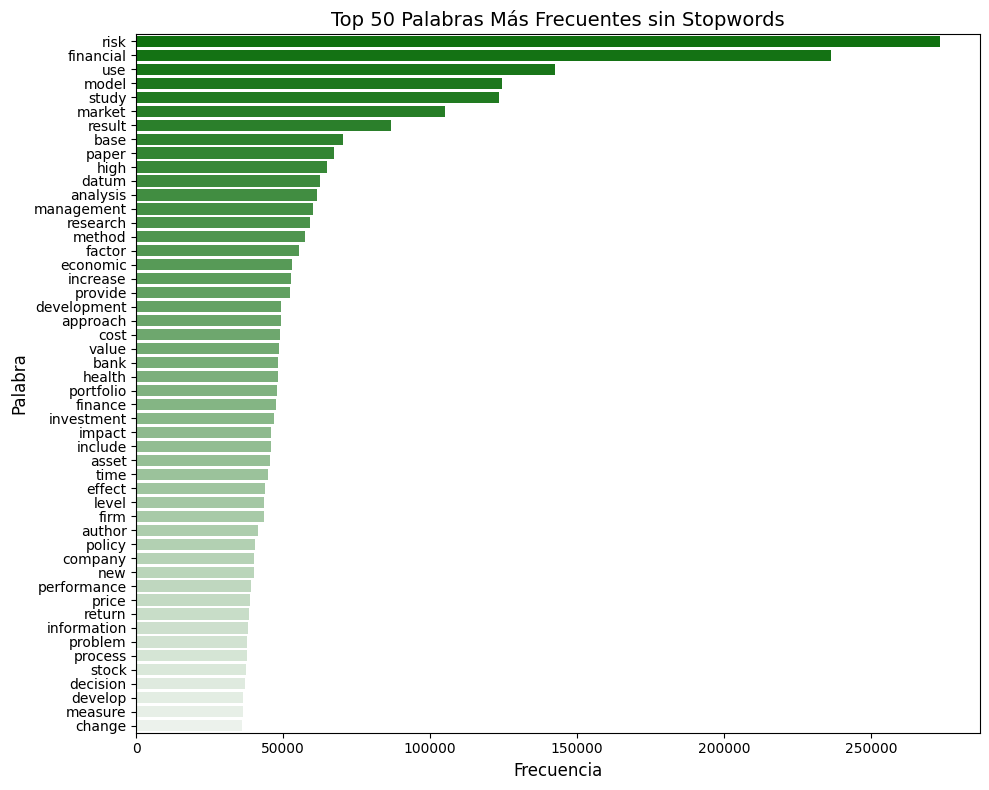

Número total de tokens: 29093862
Número de tokens únicos: 151016


In [3]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import text

# Clase para analizar y eliminar stopwords
class StopwordCleaner:
    def __init__(self, df):
        # Aceptar un DataFrame en lugar de una ruta de archivo para mayor flexibilidad
        self.df = df
    
    def remove_stopwords_optimized(self, stopwords_set, top_n=50):
        # Filtrar las palabras usando un set de stopwords
        df_cleaned = self.df[~self.df['Palabra'].isin(stopwords_set)].copy()
        df_cleaned.sort_values(by='Frecuencia', ascending=False, inplace=True)
        
        # Seleccionar top N palabras
        return df_cleaned.head(top_n)

    def plot_most_common(self, top_n=50):
        # Cargar las stopwords en inglés de sklearn
        stopwords_set = set(text.ENGLISH_STOP_WORDS)
        
        # Llamar a la función para obtener las top N palabras sin stopwords
        top_words = self.remove_stopwords_optimized(stopwords_set, top_n)
        
        # Crear gráfico de barras con seaborn
        plt.figure(figsize=(10, 8))
        sns.barplot(x='Frecuencia', y='Palabra', data=top_words, palette='light:g_r')
        
        # Configurar el título y las etiquetas del gráfico
        plt.title(f'Top {top_n} Palabras Más Frecuentes sin Stopwords', fontsize=14)
        plt.xlabel('Frecuencia', fontsize=12)
        plt.ylabel('Palabra', fontsize=12)
        
        # Mostrar gráfico
        plt.tight_layout()
        plt.show()
    
    # Función para contar el número total de tokens (palabras)
    def count_total_tokens(self):
        # Sumar todas las frecuencias para obtener el número total de tokens
        total_tokens = self.df['Frecuencia'].sum()
        return total_tokens

    # Función para contar el número de tokens únicos
    def count_unique_tokens(self):
        # Contar cuántas palabras (tokens) únicas hay en la columna 'Palabra'
        unique_tokens = self.df['Palabra'].nunique()
        return unique_tokens

# Cargar el DataFrame desde el archivo CSV (palabras más comunes)
df_palabras_comunes = pd.read_csv('palabra_frecuencia.csv')

# Crear una instancia de la clase StopwordCleaner
cleaner = StopwordCleaner(df_palabras_comunes)

# Eliminar stopwords y mostrar gráfico con las palabras más comunes
cleaner.plot_most_common(top_n=50)

# Contar el número total de tokens
total_tokens = cleaner.count_total_tokens()
print(f'Número total de tokens: {total_tokens}')

# Contar el número de tokens únicos
unique_tokens = cleaner.count_unique_tokens()
print(f'Número de tokens únicos: {unique_tokens}')
